Importing Libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix

Loading and splitting the Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_excel('/content/drive/My Drive/SmishingData/GhanaContextMessages.xlsx')
df.to_csv('smishing_data.csv', index=False)
X_train = df['Text']  # Features for training
y_train = df['Label']    # Labels for training


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['Text'], df['Label'], test_size=0.2, random_state=42)

Vectorizing the text data

In [ ]:
# Vectorize the text data using CountVectorizer
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

Training Classifier

In [ ]:
# TrainING Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_vec, y_train)


MultinomialNB()

Testing with Test set

In [ ]:
# Make predictions on the test set
y_pred = nb_classifier.predict(X_test_vec)

# Evaluating model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("\nClassification Report:\n", report)

# Printing confusion matrix
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))



Accuracy: 0.9963768115942029

Classification Report:
               precision    recall  f1-score   support

         ham       0.99      1.00      1.00       152
       smish       1.00      0.99      1.00       124

    accuracy                           1.00       276
   macro avg       1.00      1.00      1.00       276
weighted avg       1.00      1.00      1.00       276

Confusion Matrix:
[[152   0]
 [  1 123]]


Training Accuracy: 0.9936479128856625
Testing Accuracy: 0.9963768115942029

Classification Report:
               precision    recall  f1-score   support

         ham       0.99      1.00      1.00       152
       smish       1.00      0.99      1.00       124

    accuracy                           1.00       276
   macro avg       1.00      1.00      1.00       276
weighted avg       1.00      1.00      1.00       276

Confusion Matrix:
 [[152   0]
 [  1 123]]


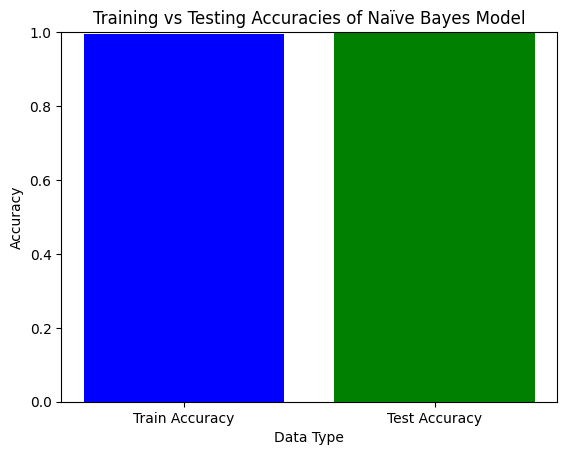

In [ ]:
# Making predictions on both the training and test sets
y_train_pred = nb_classifier.predict(X_train_vec)
y_test_pred = nb_classifier.predict(X_test_vec)

# Calculating accuracies
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Printing accuracies and classification report for the test set
print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_test_pred))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_test_pred))

# Plotting the accuracies
labels = ['Train Accuracy', 'Test Accuracy']
accuracies = [train_accuracy, test_accuracy]
plt.bar(labels, accuracies, color=['blue', 'green'])
plt.xlabel('Data Type')
plt.ylabel('Accuracy')
plt.title('Training vs Testing Accuracies of Naïve Bayes Model')
plt.ylim([0, 1])
plt.show()

Displaying mislabled texts

In [ ]:
misclassified = df.iloc[y_test.index][y_test != y_test_pred]  # Selecting rows from df based on y_test index
misclassified['Predicted'] = y_test_pred[y_test != y_test_pred]  # Adding predicted labels
misclassified = misclassified.reset_index()
print("\nMisclassified Messages:\n")
for index, row in misclassified.iterrows():
    print(f"Message: {df.iloc[row['index']]['Text']}")  # Accessing message from df using original index
    print(f"True Label: {row['Label']}, Predicted Label: {row['Predicted']}")
    print("-" * 50)



Misclassified Messages:

Message: Your MOMO account is temporarily locked for 45 days.
True Label: smish, Predicted Label: ham
--------------------------------------------------


In [ ]:
# Function to predict whether a message is harmless or smishing
def predict_message(message):
    message_vec = vectorizer.transform([message])     # Vectorizing input message
    prediction = nb_classifier.predict(message_vec)   # Predicting the label(whether its harmless or smishing)
    return prediction[0]


test_messages = [
    'If u are into betting text this number ( https://wa.me/+233538060263 ) for fixed match and join this channel (https://t.me/bayekfixed)  for free tips',
    'MobileMoney reccieved for GHS 200.00. from GOOD MOTHER-ENT. TAKORADI En-terprise. curenttbal-ane: GH307.00. avilablebalane: GH307.00.',
    'I am a project manager, we are recruiting a team, you can work from home, daily salary: 1500-3000, accept jobs on whats:http://wa.me/233200912368',
    'YOUR MOBILE MONEY ACCOUNT HAS BEEN BLOCKED DUE TO RECIEVING OF WRONG TRANSFER MONEY CALL AGENT FOR UNLOCKEN.',
    'BIG MONEY! Yesss you 0544484998 read it right! Reply VIP and habilitate yourself to 30 000GHS and much more. Reply VIP',
    'Hi dear friend,there are testimonies, Gh89.0 is BIG win for you. TODAY 1PM TO 7PM,LEAKED LOTTOCAST,GH NO FAIL! *959# TO PLAY BANKER/1to90 (( 78 )) MINE,QUARTER',
    'Payment for GHS93.02 to BluPay  .Current Balance: GHS 269.42. Transaction Id: 79462953416. Fee charged: GHS0.00,Tax Charged 0.Download the MoMo App for a Faster & Easier Experience. Click here: http://mtnghana.app.link/nsBnhItDoob',
    'Dear, Part-time job mobile phone operation anytime, earn 20-40 usd per day  add a teachers WS:https://wa.me/639163056565',
    'You have an item that cannot be delivered, please your address for verification, click: https://lihi.cc/mCGgz',
    'FABULOUS NEWS! 0544484998 start spring off right with 30 000GHS in your pocket! Reply VIP is all it takes to win many prizes.Reply VIP',
    'Today is Market Day Wednesday! Enjoy a 10% discount with your Super Saver Card on purchases worth Ghc400 and above in all Melcom stores. Happy Shopping! If you want to stop receiving this sms type DND & SMS 0551188777(E&OE).',
    'DR.S.AMPONG, NLA TODAY 100%LEAKED,NO FAIL PIs {32-89-35-1} Gh5Each { 32-1 }Gh20 WINGh9000 MomoSim*959#DOiN(Perm-2)NLA closes7PM.Call Me8PM.MyShare(HALF)'

]

for message in test_messages:
    print(f"Message: {message}")
    print(f"Prediction: {predict_message(message)}")
    print("-" * 50)

Message: If u are into betting text this number ( https://wa.me/+233538060263 ) for fixed match and join this channel (https://t.me/bayekfixed)  for free tips
Prediction: smish
--------------------------------------------------
Message: MobileMoney reccieved for GHS 200.00. from GOOD MOTHER-ENT. TAKORADI En-terprise. curenttbal-ane: GH307.00. avilablebalane: GH307.00.
Prediction: smish
--------------------------------------------------
Message: I am a project manager, we are recruiting a team, you can work from home, daily salary: 1500-3000, accept jobs on whats:http://wa.me/233200912368
Prediction: smish
--------------------------------------------------
Message: YOUR MOBILE MONEY ACCOUNT HAS BEEN BLOCKED DUE TO RECIEVING OF WRONG TRANSFER MONEY CALL AGENT FOR UNLOCKEN.
Prediction: smish
--------------------------------------------------
Message: BIG MONEY! Yesss you 0544484998 read it right! Reply VIP and habilitate yourself to 30 000GHS and much more. Reply VIP
Prediction: ham
-----